# Warm up 14 - Vehicle Stock in China

TEP4290, Spring 2024

## Preparation: Packages and data imports

Start by importing the necessary packages:

In [19]:
# Write all the necessary imports here
import pandas as pd
import numpy as np
import dynamic_stock_model
import unittest
import dynamic_stock_model.tests

Then import the data into a Dataframe using the pandas read_excel function (check the documentation to find out which arguments to use) and clean it.

In [20]:
# Extracting data from the source file into a panda Dataframe
file = 'Warm_up_14_data.xls'
# This file should be placed in the same directory as this notebook (on the JupyterHub server)

# We read the data and store it in a Dataframe called "data", using the read_excel() panda function
init_data = pd.read_excel(file, skiprows=[0,2,3], usecols=np.arange(2,16,1) ) # change arguments here

# This is just to replace all the void values in "data" by 0, which makes things easier
init_data.fillna(0, inplace=True)

init_data.head()

,Quantity,Time,Population,Inflow,Outflow,Stock Change,Stock,cars per 1000 people,Kilometrage per vehicle,Fuel efficiency,Carbon intensity,Total km driven,Total gasoline consumend,Total direct CO2 emissions
0,Historic data,1950,544951.0,1157.864047,0.0,0.0,0.0,0.0,27200.0,9.07,2.4,0.0,0.0,0.0
1,0,1951,555606.0,3085.651022,0.0,0.0,0.0,0.0,27200.0,9.07,2.4,0.0,0.0,0.0
2,0,1952,566261.0,1314.644583,0.0,0.0,0.0,0.0,27200.0,9.07,2.4,0.0,0.0,0.0
3,0,1953,576916.0,4843.545514,0.0,0.0,0.0,0.0,27200.0,9.07,2.4,0.0,0.0,0.0
4,0,1954,587571.0,3575.745174,0.0,0.0,0.0,0.0,27200.0,9.07,2.4,0.0,0.0,0.0


We create two Dataframes from data:
 - historic_data with values up to 2008
 - future_data with values for 2009 and after


In [21]:
init_historic_data = init_data[init_data.Time < 2009]
init_future_data = init_data[init_data.Time >= 2009]

model_historic_data = init_historic_data.copy()
model_future_data = init_future_data.copy()


model_data = pd.concat([model_historic_data, model_future_data], ignore_index=True) 
model_data

,Quantity,Time,Population,Inflow,Outflow,Stock Change,Stock,cars per 1000 people,Kilometrage per vehicle,Fuel efficiency,Carbon intensity,Total km driven,Total gasoline consumend,Total direct CO2 emissions
0,Historic data,1950,544951.0,1157.864047,0.0,0.0,0.0,0.000000,27200.0,9.07,2.4,0.0,0.0,0.0
1,0,1951,555606.0,3085.651022,0.0,0.0,0.0,0.000000,27200.0,9.07,2.4,0.0,0.0,0.0
2,0,1952,566261.0,1314.644583,0.0,0.0,0.0,0.000000,27200.0,9.07,2.4,0.0,0.0,0.0
3,0,1953,576916.0,4843.545514,0.0,0.0,0.0,0.000000,27200.0,9.07,2.4,0.0,0.0,0.0
4,0,1954,587571.0,3575.745174,0.0,0.0,0.0,0.000000,27200.0,9.07,2.4,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0,2046,1435640.2,0.000000,0.0,0.0,0.0,433.238601,15200.0,5.00,2.4,0.0,0.0,0.0
97,0,2047,1430991.4,0.000000,0.0,0.0,0.0,438.300291,15150.0,5.00,2.4,0.0,0.0,0.0
98,0,2048,1426342.6,0.000000,0.0,0.0,0.0,442.790609,15100.0,5.00,2.4,0.0,0.0,0.0
99,0,2049,1421693.8,0.000000,0.0,0.0,0.0,446.695272,15050.0,5.00,2.4,0.0,0.0,0.0


## Inflow-driven model

Calculate outflows, stock change and stock for historic data, using an inflow-driven model:

In [22]:
#Test with package
from dynamic_stock_model import DynamicStockModel
to = 5
sigma = 15

ltdic = {'Type' : 'Normal',
         'Mean' : [to],
         'StdDev' : [sigma]}

Ncp_t_h = []
for i in range (0, len(model_historic_data.Time)) :
    Ncp_t_h.append(model_historic_data.Stock[i] / model_historic_data.Population[i])

inflow_data = DynamicStockModel(t = init_historic_data.Time, i = init_historic_data.Inflow, lt = ltdic)

inflow_data.compute_s_c_inflow_driven()
inflow_data.compute_o_c_from_s_c()

model_historic_data.loc[:58,"Stock"] = inflow_data.compute_stock_total()[0]
model_historic_data.loc[:58,"Outflow"] = inflow_data.compute_outflow_total()[0]
model_historic_data.loc[:58,"Stock Change"]= inflow_data.compute_stock_change()[0]
model_historic_data.loc[:58,"cars per 1000 people"] = Ncp_t_h


## Stock-driven model

Calculate stock change, outflows and inflows for future data, using a stock-driven model.
You need to run the stock-driven model for all years, combining historic stock data from the inflow-driven model, and future stock data from population and car ownership projections.

In [23]:
ltdic = {'Type' : 'Normal',
         'Mean' : [to],
         'StdDev' : [sigma]}

S_t_f=[]
for i in range (59,101) :
    S_t_f.append(init_future_data["Population"][i]*init_future_data["cars per 1000 people"][i])

stockdriven_data = DynamicStockModel(t = init_data.Time, s = np.concatenate([model_historic_data['Stock'], np.array(S_t_f)]), lt = ltdic)

TotOutflow = []
for i in range(0, 42):
    s = 0
    for j in range(0, 42):
        s = stockdriven_data.compute_stock_driven_model()[1][i][j] + s
    TotOutflow.append(s)

model_future_data.loc[59:100, "Stock"] = S_t_f
model_future_data.loc[59:100, "Outflow"]= np.sum(stockdriven_data.o_c,axis=1)[59:101]
model_future_data.loc[59:100, "Inflow"]= stockdriven_data.compute_stock_driven_model()[2][59:101]

#Calculation of the stocks
Stockchange = []

for i in range (0,42) :
        Stockchange.append(stockdriven_data.compute_stock_driven_model()[2][59:101][i] - np.sum(stockdriven_data.o_c,axis=1)[59:101][i])
Stockchange

model_future_data.loc[59:100, "Stock Change"] = Stockchange

model_future_data



,Quantity,Time,Population,Inflow,Outflow,Stock Change,Stock,cars per 1000 people,Kilometrage per vehicle,Fuel efficiency,Carbon intensity,Total km driven,Total gasoline consumend,Total direct CO2 emissions
59,Future Scenario,2009,1345767.4,9.329796e+06,1.065392e+06,8.264404e+06,4.547355e+07,33.790051,23500.000000,8.052500,2.4,0.0,0.0,0.0
60,0,2010,1354146.0,9.668458e+06,1.300886e+06,8.367572e+06,5.384112e+07,39.760204,23142.857143,7.907143,2.4,0.0,0.0,0.0
61,0,2011,1362516.4,1.121099e+07,1.544595e+06,9.666394e+06,6.350752e+07,46.610459,22785.714286,7.761786,2.4,0.0,0.0,0.0
62,0,2012,1370886.8,1.281419e+07,1.826602e+06,1.098759e+07,7.449511e+07,54.340816,22428.571429,7.616429,2.4,0.0,0.0,0.0
63,0,2013,1379257.2,1.447900e+07,2.148108e+06,1.233089e+07,8.682600e+07,62.951276,22071.428571,7.471071,2.4,0.0,0.0,0.0
64,0,2014,1387627.6,1.620651e+07,2.510215e+06,1.369629e+07,1.005223e+08,72.441837,21714.285714,7.325714,2.4,0.0,0.0,0.0
65,0,2015,1395998.0,1.799772e+07,2.913931e+06,1.508379e+07,1.156061e+08,82.812500,21357.142857,7.180357,2.4,0.0,0.0,0.0
66,0,2016,1403029.4,1.972761e+07,3.360168e+06,1.636744e+07,1.319735e+08,94.063265,21000.000000,7.035000,2.4,0.0,0.0,0.0
67,0,2017,1410060.8,2.161316e+07,3.846506e+06,1.776666e+07,1.497402e+08,106.194133,20642.857143,6.889643,2.4,0.0,0.0,0.0
68,0,2018,1417092.2,2.356036e+07,4.375928e+06,1.918444e+07,1.689246e+08,119.205102,20285.714286,6.744286,2.4,0.0,0.0,0.0


In [24]:
model_data = pd.concat([model_historic_data, model_future_data], ignore_index=True)
model_data

,Quantity,Time,Population,Inflow,Outflow,Stock Change,Stock,cars per 1000 people,Kilometrage per vehicle,Fuel efficiency,Carbon intensity,Total km driven,Total gasoline consumend,Total direct CO2 emissions
0,Historic data,1950,544951.0,1.157864e+03,0.000000e+00,1.157864e+03,1.157864e+03,0.000000,27200.0,9.07,2.4,0.0,0.0,0.0
1,0,1951,555606.0,3.085651e+03,2.971904e+01,3.055932e+03,4.213796e+03,0.000000,27200.0,9.07,2.4,0.0,0.0,0.0
2,0,1952,566261.0,1.314645e+03,1.093847e+02,1.205260e+03,5.419056e+03,0.000000,27200.0,9.07,2.4,0.0,0.0,0.0
3,0,1953,576916.0,4.843546e+03,1.447068e+02,4.698839e+03,1.011789e+04,0.000000,27200.0,9.07,2.4,0.0,0.0,0.0
4,0,1954,587571.0,3.575745e+03,2.706586e+02,3.305087e+03,1.342298e+04,0.000000,27200.0,9.07,2.4,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0,2046,1435640.2,2.285046e+07,1.677183e+07,6.078631e+06,6.219748e+08,433.238601,15200.0,5.00,2.4,0.0,0.0,0.0
97,0,2047,1430991.4,2.195966e+07,1.673046e+07,5.229196e+06,6.272039e+08,438.300291,15150.0,5.00,2.4,0.0,0.0,0.0
98,0,2048,1426342.6,2.101735e+07,1.665019e+07,4.367161e+06,6.315711e+08,442.790609,15100.0,5.00,2.4,0.0,0.0,0.0
99,0,2049,1421693.8,2.002422e+07,1.653143e+07,3.492791e+06,6.350639e+08,446.695272,15050.0,5.00,2.4,0.0,0.0,0.0


## Final calculations

Perform the calculations for distance driven, fuel consumption and CO2 emissions

In [25]:
dd_t = []
fc_t =[]
co2em = []

for i in range (0, len(init_data.Time)):
    dd_t.append(model_data["Kilometrage per vehicle"][i] * model_data.Stock[i]/(10**9))
    fc_t.append(dd_t[i]* 10 * model_data['Fuel efficiency'][i])
    co2em.append(fc_t[i] * model_data["Carbon intensity"][i])

model_data.loc[:100, 'Total km driven'] = dd_t
model_data.loc[:100, 'Total gasoline consumend']=fc_t
model_data.loc[:100, 'Total direct CO2 emissions'] = co2em

## Plot the results

Plot the results of the model for inflows and outflows, stock change, stock, total distance driven, total fuel consumption, and total CO2 emissions

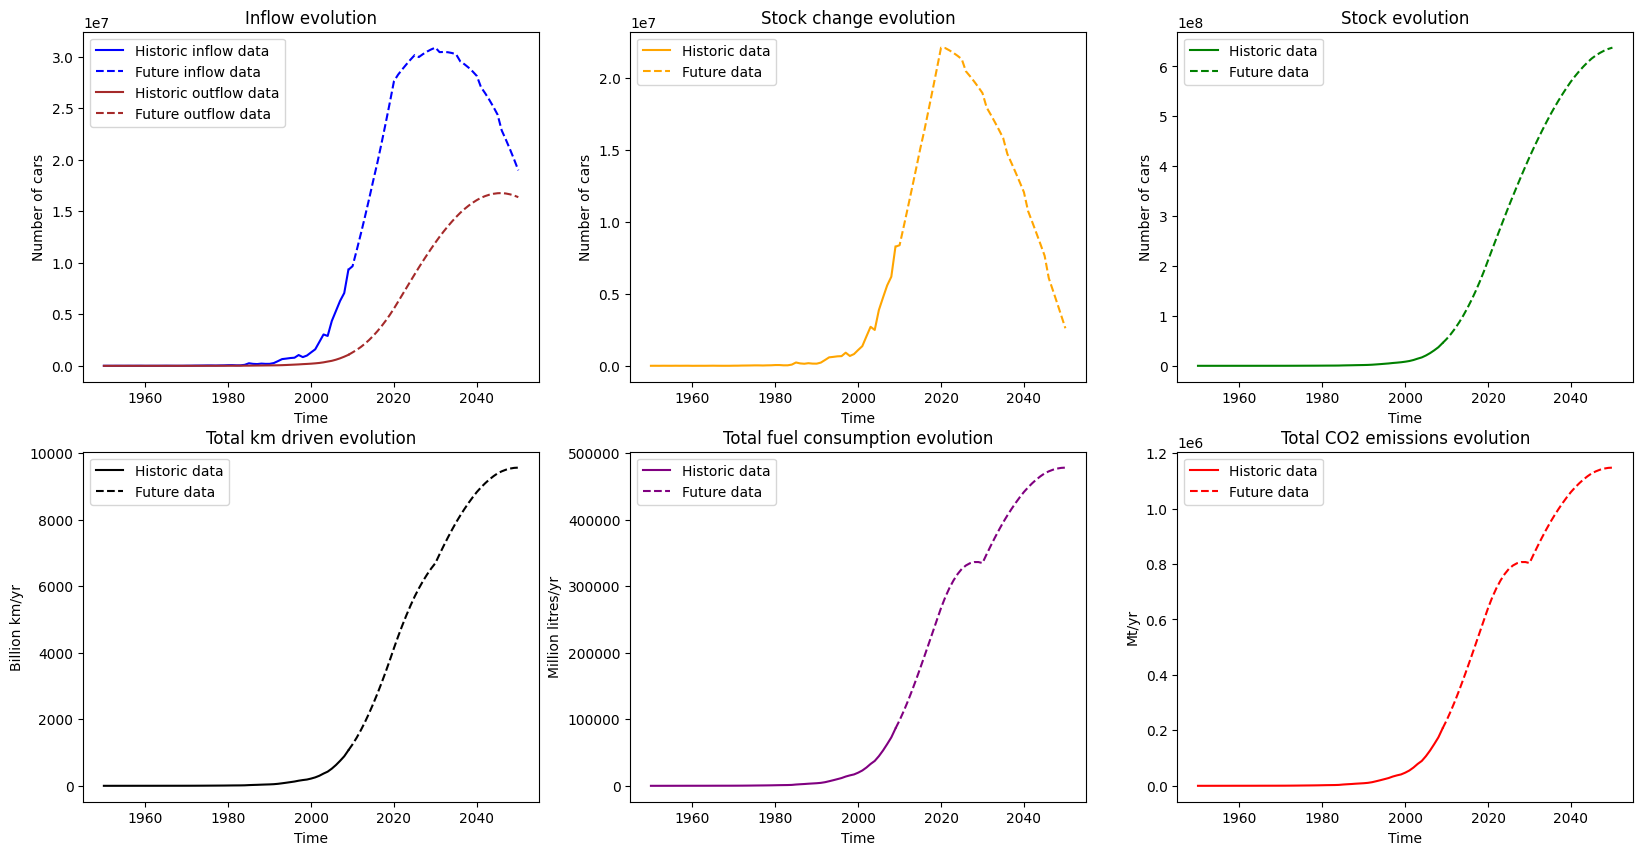

In [26]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 3, figsize=(20,10))
#Plotting the inflow
axs[0, 0].plot(model_data[model_data['Time'] <= 2009]['Time'], model_data[model_data['Time'] <= 2009]['Inflow'], color='blue', label="Historic inflow data")
axs[0, 0].plot(model_data[model_data['Time'] >= 2009]['Time'], model_data[model_data['Time'] >= 2009]['Inflow'], '--',  color='blue', label="Future inflow data")
#Plotting the outflow
axs[0, 0].plot(model_data[model_data['Time'] <= 2009]['Time'], model_data[model_data['Time'] <= 2009]['Outflow'], color='brown', label="Historic outflow data")
axs[0, 0].plot(model_data[model_data['Time'] >= 2009]['Time'], model_data[model_data['Time'] >= 2009]['Outflow'], '--',  color='brown', label="Future outflow data")
axs[0, 0].set_xlabel("Time")
axs[0, 0].set_ylabel("Number of cars")
axs[0, 0].set_title("Inflow evolution")
axs[0, 0].legend()

axs[0, 1].plot(model_data[model_data['Time'] <= 2009]['Time'], model_data[model_data['Time'] <= 2009]['Stock Change'], color='orange', label="Historic data")
axs[0, 1].plot(model_data[model_data['Time'] >= 2009]['Time'], model_data[model_data['Time'] >= 2009]['Stock Change'],'--', color='orange', label="Future data")
axs[0, 1].set_xlabel("Time")
axs[0, 1].set_ylabel("Number of cars")
axs[0, 1].set_title("Stock change evolution")
axs[0, 1].legend()

axs[0, 2].plot(model_data[model_data['Time'] <= 2009]['Time'], model_data[model_data['Time'] <= 2009]['Stock'], color='green', label="Historic data")
axs[0, 2].plot(model_data[model_data['Time'] >= 2009]['Time'], model_data[model_data['Time'] >= 2009]['Stock'], '--', color='green', label="Future data")
axs[0, 2].set_xlabel("Time")
axs[0, 2].set_ylabel("Number of cars")
axs[0, 2].set_title("Stock evolution")
axs[0, 2].legend()

axs[1, 0].plot(model_data[model_data['Time'] <= 2009]['Time'], model_data[model_data['Time'] <= 2009]['Total km driven'], color='black', label="Historic data")
axs[1, 0].plot(model_data[model_data['Time'] >= 2009]['Time'], model_data[model_data['Time'] >= 2009]['Total km driven'], '--', color='black', label="Future data")
axs[1, 0].set_xlabel("Time")
axs[1, 0].set_ylabel("Billion km/yr")
axs[1, 0].set_title("Total km driven evolution")
axs[1, 0].legend()

axs[1, 1].plot(model_data[model_data['Time'] <= 2009]['Time'], model_data[model_data['Time'] <= 2009]['Total gasoline consumend'], color='purple', label="Historic data")
axs[1, 1].plot(model_data[model_data['Time'] >= 2009]['Time'], model_data[model_data['Time'] >= 2009]['Total gasoline consumend'], '--', color='purple', label="Future data")
axs[1, 1].set_xlabel("Time")
axs[1, 1].set_ylabel("Million litres/yr")
axs[1, 1].set_title("Total fuel consumption evolution")
axs[1, 1].legend()

axs[1, 2].plot(model_data[model_data['Time'] <= 2009]['Time'], model_data[model_data['Time'] <= 2009]['Total direct CO2 emissions'], color='red', label="Historic data")
axs[1, 2].plot(model_data[model_data['Time'] >= 2009]['Time'], model_data[model_data['Time'] >= 2009]['Total direct CO2 emissions'], '--', color='red', label="Future data")
axs[1, 2].set_xlabel("Time")
axs[1, 2].set_ylabel("Mt/yr")
axs[1, 2].set_title("Total CO2 emissions evolution")
axs[1, 2].legend()

## Time cohort

In [27]:
time_cohort = pd.read_excel(file, sheet_name='Stock_TC', skiprows = [0,1], usecols=list(range(3, 104)))
time_cohort.fillna(0, inplace=True)
n,p = time_cohort.shape
inflow_data_complet = DynamicStockModel(t = init_data.Time, i = model_data.Inflow, lt = ltdic)

#Time-cohort for the historic data
for i in range (0,101):
    for j in range (0,59) :
        time_cohort.iloc[i,j] = inflow_data_complet.compute_s_c_inflow_driven()[0][i][j]

#Time-cohort for the future data 
for i in range (59,101):
    for j in range (59,101) :
        time_cohort.iloc[i,j] = stockdriven_data.compute_stock_driven_model()[0][i][j]

time_cohort


,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,1157.864047,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,1128.145006,3085.651022,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,1097.960054,3006.451231,1314.644583,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,1067.437844,2926.009812,1280.901436,4843.545514,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,1036.711472,2844.669615,1246.629292,4719.225626,3575.745174,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,442.382085,1178.926609,502.282815,1850.560761,1366.175606,997.403109,2311.273932,1221.494588,2198.407024,2493.592945,...,2.349976e+07,2.369608e+07,2.380959e+07,2.383320e+07,2.376033e+07,2.285046e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
97,442.382085,1178.926608,502.282815,1850.560758,1366.175602,997.403105,2311.273921,1221.494578,2198.407001,2493.592906,...,2.278195e+07,2.299221e+07,2.312423e+07,2.317066e+07,2.312460e+07,2.226396e+07,2.195966e+07,0.000000e+00,0.000000e+00,0.000000e+00
98,442.382085,1178.926607,502.282814,1850.560756,1366.175600,997.403103,2311.273913,1221.494572,2198.406984,2493.592879,...,2.206890e+07,2.228990e+07,2.243734e+07,2.250369e+07,2.248176e+07,2.166826e+07,2.139602e+07,2.101735e+07,0.000000e+00,0.000000e+00
99,442.382085,1178.926607,502.282814,1850.560755,1366.175599,997.403101,2311.273907,1221.494568,2198.406973,2493.592861,...,2.136373e+07,2.159225e+07,2.175198e+07,2.183523e+07,2.183461e+07,2.106590e+07,2.082354e+07,2.047790e+07,2.002422e+07,0.000000e+00


## Exports the results

Export the results to a new Excel file - you can then in the end before submission copy the stock over to the existing data if you prefer to, but it is not required of you

In [28]:
model_data.to_excel('Exercise_1_Data.xls.xlsx', index=False)
time_cohort.to_excel('Stock_TC.xlsx', index=False)

print("Les données ont été enregistrées")

Les données ont été enregistrées


## Interpretation

We realize that it is possible to obtain all the information using the available data, and to obtain this data in several forms (by year, by cohort) using dynamics stock models. The jonction between the historic data and the forecast data is consistent and confirms the validity of the model.
We also observe the "rebond effect" in 2020, and it would be interesting to compare the forecasting with the effective data.

We can see that the total kilometrage reach a peak (10000 billion) in 2050, such as the total CO2 emissions (1,2 Mt).
